# Simple Appliances with multiple functioning time

In [1]:
# importing functions
from ramp import User,calc_peak_time_range,yearly_pattern
import pandas as pd

### Creating a user category 

In [2]:
household = User(
    user_name = "Household",
    num_users = 10,
)

### Creating a simple appliance with two functioning time

In [3]:
indoor_bulb = household.add_appliance(
    name = "Indoor Light Bulb",
    number = 6,
    power  = 7,
    num_windows = 2,
    func_time = 120,
    time_fraction_random_variability = 0.2,
    func_cycle = 10,
    window_1 = [1170,1440], # from 19:30 to 24:00
    window_2 = [0,30], # from 24 to 00:30
    random_var_w = 0.35,
)


<AxesSubplot:>

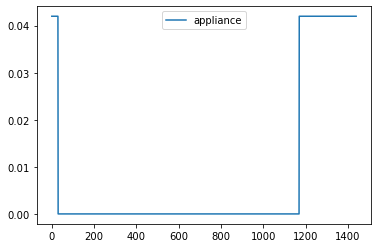

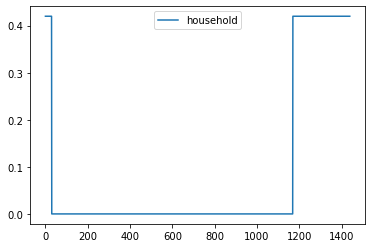

In [4]:
# Checking the maximum profile of the appliance and user

max_profile_bulb = pd.DataFrame(indoor_bulb.maximum_profile,columns=["appliance"])
max_profile_user = pd.DataFrame(household.maximum_profile,columns=["household"])

max_profile_bulb.plot()
max_profile_user.plot()

### Defining the peak time range using the calc_peak_time_range

In [5]:
peak_time_range = calc_peak_time_range(
    user_list = [household]
)

print(peak_time_range)

[1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235
 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249
 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263
 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277
 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291
 1292 1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305
 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319
 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333
 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347
 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361
 1362 1363 1364 1365 1366 1367 1368 1369]


### Defining the yearly patterns
by default the yearly_pattern function returns weekdays (defined by 0) /weekends (defined by 1) division

In [6]:
year_behaviour = yearly_pattern()

print(year_behaviour)

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.

### Generating a profile for the ith day of the year

In [7]:
single_profile = household.generate_single_load_profile(
    prof_i = 1, # the day to generate the profile
    peak_time_range = peak_time_range,
    day_type = year_behaviour[1]
)


<AxesSubplot:>

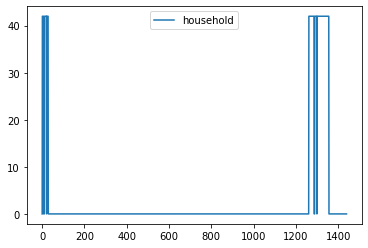

In [8]:
single_profile = pd.DataFrame(single_profile,columns=["household"])
single_profile.plot()

### whole year profile can be generated

In [9]:
whole_year_profile = []

for i in range(365):
    whole_year_profile.extend(
        household.generate_single_load_profile(
                prof_i = i,
                peak_time_range = peak_time_range,
                day_type = year_behaviour[i]
                
        )
    )

In [10]:
### Generating aggregated_load_profile for the user category

In [11]:
aggregated_profile = household.generate_aggregated_load_profile(
    prof_i=1,
    peak_time_range=peak_time_range,
    day_type=year_behaviour[1]
)

<AxesSubplot:>

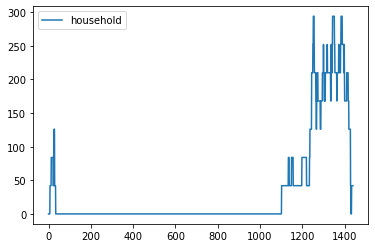

In [12]:
aggregated_profile = pd.DataFrame(aggregated_profile,columns = ["household"])
aggregated_profile.plot()